In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler, MinMaxScaler, RobustScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor,XGBRFRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,root_mean_squared_error,r2_score


## 1. Problem Definition

Life expectancy is a critical indicator of a population's health and overall well-being. It reflects the effectiveness of healthcare systems, economic prosperity, and social development. Despite significant advancements in healthcare and technology, disparities in life expectancy persist across different countries and regions, influenced by factors such as GDP, access to medical facilities, education, and environmental conditions. The goal of this project is to develop a machine learning model to predict life expectancy based on socio-economic and health-related indicators.

## 2. Data Collection
This data is taken from Kaggle. It has life expectancy and health-related data from the WHO's Global Health Observatory and economic data from the United Nations for 193 countries, focusing on the years 2000–2015 to analyze critical factors impacting life expectancy.  The cleaned dataset includes 22 columns and 2938 rows, with 20 predictive variables categorized into immunization, mortality, economic, and social factors for analysis.

In [67]:
df = pd.read_csv('../data/life_expectancy_data.csv')

## 3. Data Exploration and Preparation
- Let's first start by looking at what the data has


In [68]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [69]:
df.shape

(2938, 22)

In [70]:
df.head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [71]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

- As we can see above `Country` and `Status` are categorical while the rest are numerical. Let's see what the categorical data looks like.

In [73]:
df.describe(include="object")

,Country,Status
count,2938,2938
unique,193,2
top,Afghanistan,Developing
freq,16,2426


In [74]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

- As we can see above there are a lot of null values in most of the columns. We will handle this later. Let's first handle the awkward spaces in the column names.


In [75]:
df.rename(columns=lambda x: x.strip(), inplace=True)
df.rename(columns={'thinness  1-19 years': 'thinness 1-19 years'}, inplace=True)

In [76]:
df.duplicated().sum()

0

- The data does not have any duplicated entries

In [77]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life expectancy,2928.0,6.922493e+01,9.523867e+00,36.30000,63.100000,7.210000e+01,7.570000e+01,8.900000e+01
Adult Mortality,2928.0,1.647964e+02,1.242921e+02,1.00000,74.000000,1.440000e+02,2.280000e+02,7.230000e+02
infant deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2744.0,4.602861e+00,4.052413e+00,0.01000,0.877500,3.755000e+00,7.702500e+00,1.787000e+01
percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B,2385.0,8.094046e+01,2.507002e+01,1.00000,77.000000,9.200000e+01,9.700000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2904.0,3.832125e+01,2.004403e+01,1.00000,19.300000,4.350000e+01,5.620000e+01,8.730000e+01
under-five deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


### Univariate Analysis

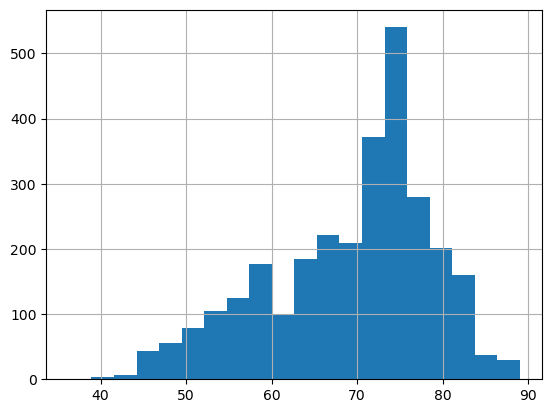

In [78]:
df['Life expectancy'].hist(bins=20)
plt.show()

In [79]:
df['Life expectancy'].skew()

-0.6386047358773552

- Life expectancy is slightly negatively skewed, we have more small values than big values

C:\Users\hanna\AppData\Local\Temp\ipykernel_31336\2981543184.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


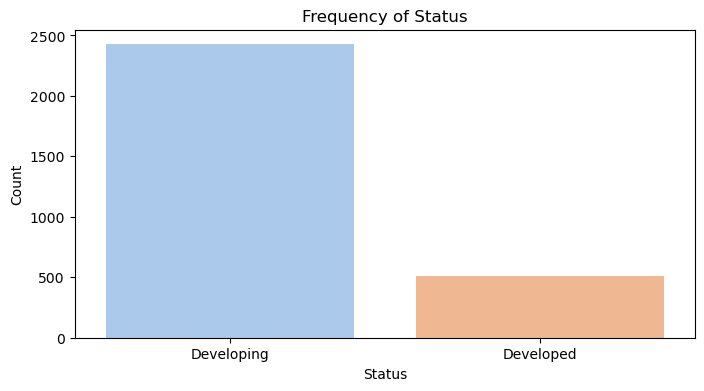

In [80]:
# df['Status'].value_counts().plot.pie(autopct='%1.1f%%')
cat_cols = ['Status'] 
plt.show()
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, palette='pastel')
    plt.title(f'Frequency of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

- We have a lot of developing countries

### Bivariate Analysis

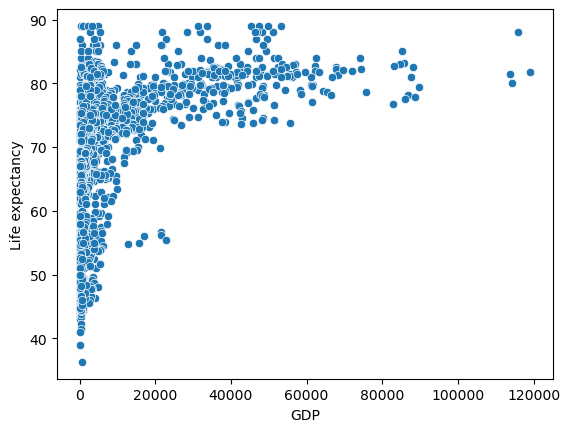

In [81]:
sns.scatterplot(x='GDP', y='Life expectancy', data=df)
plt.show()


- As `GDP` increases, life expectancy tends to improve. Beyond a certain `GDP`, the improvement in life expectancy seems to plateau. This indicates that after a certain level of economic prosperity, factors other than GDP (such as healthcare quality or lifestyle) might play a more significant role in life expectancy.

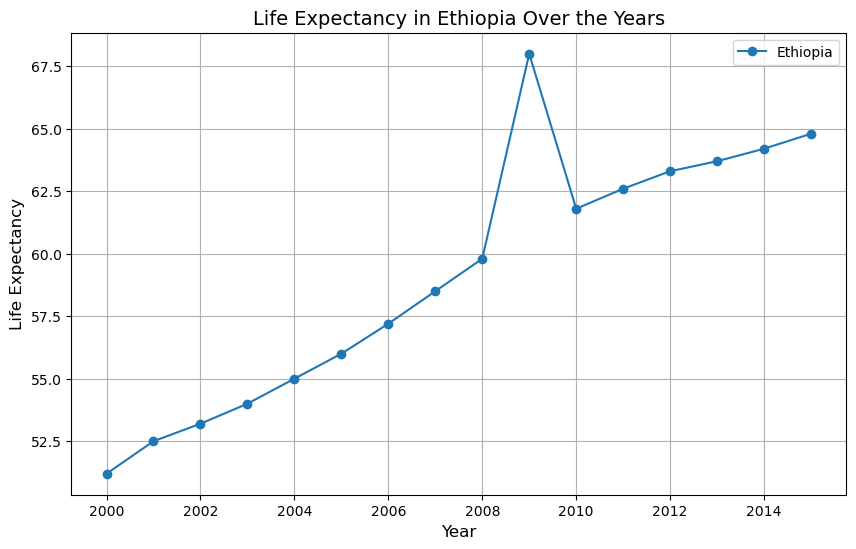

In [ ]:

ethiopia_data = df[df['Country'] == 'Ethiopia']

plt.figure(figsize=(10, 6))
plt.plot(ethiopia_data['Year'], ethiopia_data['Life expectancy'], marker='o', label='Ethiopia')
plt.title('Life Expectancy in Ethiopia Over the Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Life Expectancy', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

### Observation from the above graph
- There is a spike between the year 2008 and 2010. It is likely an outlier.

<Figure size 1000x600 with 0 Axes>

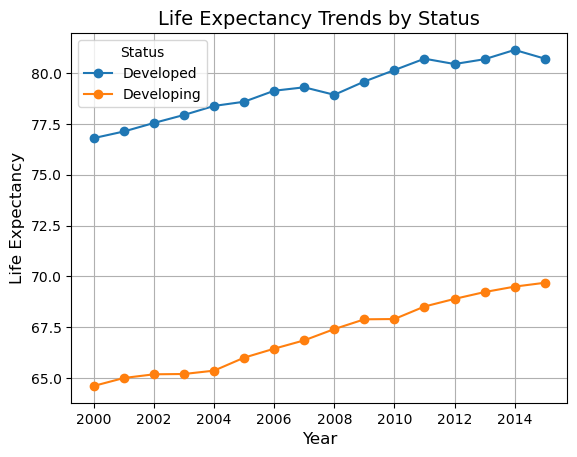

In [83]:
# Calculate mean life expectancy for each year and status
mean_life_by_year = df.groupby(['Year', 'Status'])['Life expectancy'].mean().unstack()

# Plot the line chart
plt.figure(figsize=(10, 6))
mean_life_by_year.plot(marker='o')
plt.title('Life Expectancy Trends by Status', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Life Expectancy', fontsize=12)
plt.grid(True)
plt.legend(title='Status')
plt.show()

### Observations from the above graph
- There is a huge gap in `life expectancy` in between developing and developed countries. But there is a steady increase in life expectancy for both.

### Multivariate Analysis


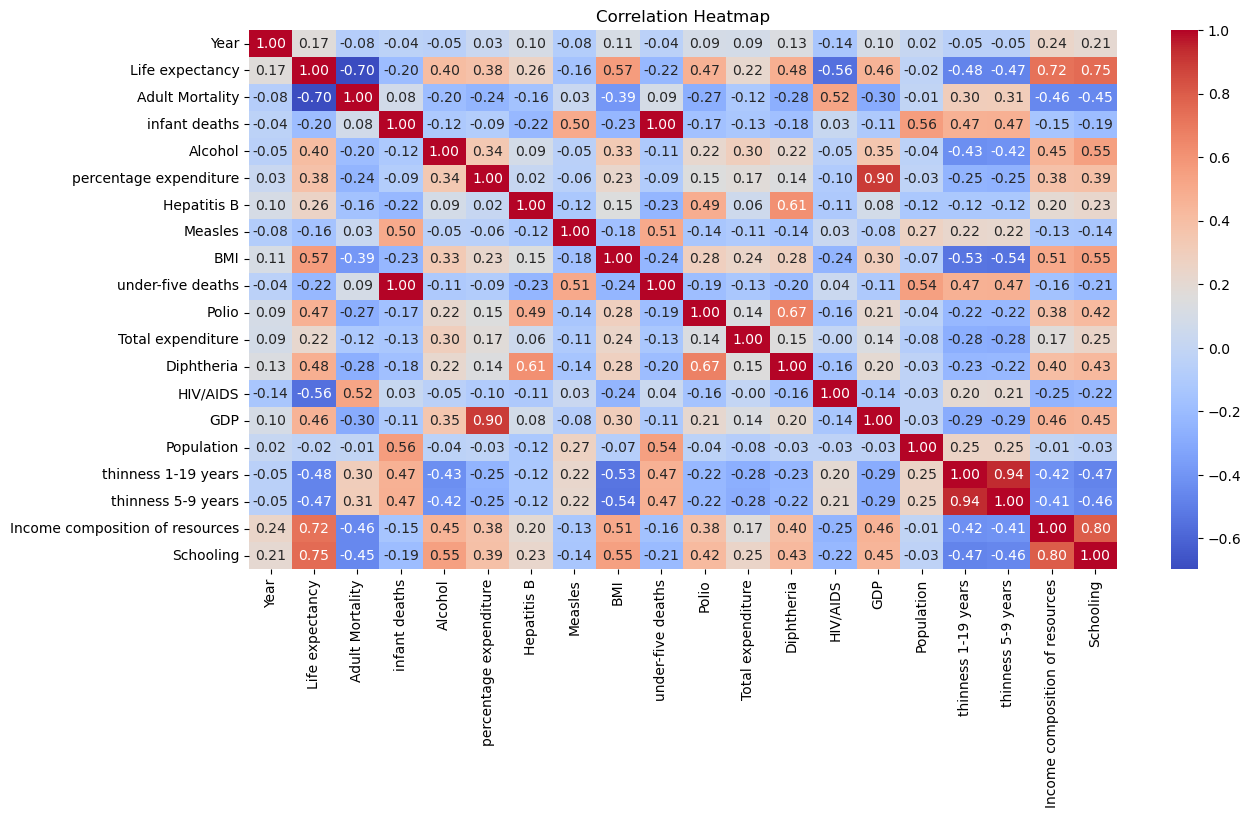

In [ ]:
corr_matrix = df.drop(columns=['Country','Status']).corr()

plt.figure(figsize=(14, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Observations from the above heatmap
- `infant deaths` and `under-five deaths` are strongly correlated so we can drop one of them
- There is also a strong correlation between `thinness 1-19 years` and `thinness 5-9 years`. Almost identical.
- There is a positive correlation between `GDP` and `percentage expenditure`
- `Hepatitis B` and `Polio` vaccine coverage shows positive relationship with life expectancy

### Data Splitting
Before we start preprocessing the data we have to split it to avoid data leakage. Data leakage happens when information from outside the training dataset is used to create the model. This can lead to overly optimistic performance estimates, and the model may not generalize well on unseen data.

In [85]:
df_train,df_test=train_test_split(df,test_size=0.2,random_state=42)

### Feature Engineering
Let's first encode `Status`. Since this variable does not have ordinal relationship I will use One-Hot Encoding to avoid any unintended numeric relationship.

In [86]:
status_encoder = LabelEncoder()
df_train['Status'] = status_encoder.fit_transform(df_train['Status'])
df_test['Status'] = status_encoder.transform(df_test['Status'])

### Data Cleaning

- `Hepatitis B` has a lot of missing rows so I dropped it. 
- The name of the country is irrelevant to the prediction we want to make so it will be dropped as well. 
- `thinness 5-9 years` and `thinness 1-19 years` are almost identical so the former will be dropped.
- `infant deaths` and `under-five death` are almost identical so the former will be dropped.

In [87]:
df_train.drop(['Hepatitis B','Country','thinness 5-9 years','infant deaths'], axis=1, inplace=True)
df_test.drop(['Hepatitis B','Country','thinness 5-9 years','infant deaths'], axis=1, inplace=True)

In [88]:
X_train, y_train = df_train.drop(columns=['Life expectancy']), df_train['Life expectancy']
X_test, y_test = df_test.drop(columns=['Life expectancy']), df_test['Life expectancy']

Lets first preprocess the training data

In [89]:
number_cols = df_train.drop(columns=['Life expectancy','Status']).columns

num_imputer = SimpleImputer(strategy='median')
X_num = num_imputer.fit_transform(X_train[number_cols])

scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)

status_imputer = SimpleImputer(strategy='most_frequent')
X_status = status_imputer.fit_transform(X_train[['Status']])

X_train_preprocessed = np.hstack([X_num_scaled, X_status])



Lets now apply the same transformation to test data

In [90]:
X_num_test = scaler.transform(num_imputer.transform(X_test[number_cols]))
X_status_test = status_imputer.transform(X_test[['Status']])
X_test_preprocessed = np.hstack([X_num_test, X_status_test])

In [91]:
y_train.fillna(y_train.median(),inplace=True)
y_test.fillna(y_train.median(),inplace=True)

We have now handled all missing values.

## 4. Algorithm Selection
This section of the code initializes data structures to store performance metrics of different machine learning models and defines a list of classification models to evaluate. We will then evaluate various machine learning models in terms of their ability to predict stress levels. Metrics such as r2score and rmse will be computed for each model, and the results will be stored for comparison.

In [ ]:
model_name=[]
r2score=[]
rmse=[]
models=[
    GradientBoostingRegressor(random_state=42),
    SVR(),
    RandomForestRegressor(random_state=42),
    LinearRegression(),
    ExtraTreesRegressor(random_state=42),
    AdaBoostRegressor(random_state=42),
    DecisionTreeRegressor(random_state=42),
    XGBRegressor(random_state=42),
    XGBRFRegressor(random_state=42)
]



## 5. Model Development and Training

- We now train and evaluate multiple models, storing their names and performance metrics

In [93]:
for model in models:
    model.fit(X_train_preprocessed , y_train)
    y_pred = model.predict(X_test_preprocessed)
    model_name.append(model.__class__.__name__)
    r2score.append(str(r2_score( y_test , y_pred ) * 100 ))
    rmse.append(str(root_mean_squared_error( y_test , y_pred )))

## 6. Model Evaluation

The below code displays the performance of each model alongside its name sorted in ascending order based on its R2_score

In [94]:
models_df = pd.DataFrame({"Model-Name":model_name, "R2_score": r2score ,'RMSE':rmse})
models_df = models_df.astype({"R2_score": float, "RMSE": float})
models_df=models_df.sort_values("R2_score", ascending = False)

In [95]:
models_df

,Model-Name,R2_score,RMSE
4,ExtraTreesRegressor,97.466485,1.481818
2,RandomForestRegressor,96.826659,1.658408
7,XGBRegressor,96.626068,1.710020
0,GradientBoostingRegressor,94.991307,2.083509
8,XGBRFRegressor,94.890276,2.104417
6,DecisionTreeRegressor,92.464570,2.555566
5,AdaBoostRegressor,90.610847,2.852636
1,SVR,87.975543,3.228240
3,LinearRegression,81.209445,4.035552


- ExtraTreesRegressor's performance is the best from all the models so we will use that for prediction

In [96]:
# joblib.dump(models[4], 'extraTreesRegressor.pkl')

In [97]:
# joblib.dump(scaler, 'scaler.pkl')

- Randomly picked one row to test the performance

In [98]:
row = df.iloc[119] 
row

Country                              Australia
Year                                      2008
Status                               Developed
Life expectancy                           81.3
Adult Mortality                           66.0
infant deaths                                1
Alcohol                                  10.76
percentage expenditure             8547.292357
Hepatitis B                               94.0
Measles                                     65
BMI                                       62.9
under-five deaths                            1
Polio                                     92.0
Total expenditure                         8.78
Diphtheria                                92.0
HIV/AIDS                                   0.1
GDP                                 49664.6854
Population                            212492.0
thinness 1-19 years                        0.7
thinness 5-9 years                         0.6
Income composition of resources          0.921
Schooling    

- Selected the relevant features from the row. Applied the same preprocessing and performed the prediction.

In [99]:
numerical_features = row[number_cols].values.reshape(1, -1) 
categorical_features =np.array([[row['Status']]])  

scaled_numerical_features = scaler.transform(numerical_features)
processed_categorical_features = status_encoder.transform(categorical_features).reshape(1,-1)

processed_row = np.hstack([scaled_numerical_features, processed_categorical_features])
print(processed_row.tolist())
prediction = models[4].predict(np.array(processed_row.tolist()).reshape(1,-1))

print(f"The prediction for the selected row is: {prediction[0]}")

[[0.10031505683650839, -0.7977433771047159, 1.5949540919358989, 4.009203527758731, -0.19450019556640447, 1.2164006275309602, -0.2556748210538774, 0.39673091116046255, 1.1872959634788534, 0.40284065138106284, -0.32041758718549357, 3.2522937384627824, -0.19349515573428228, -0.932146200985637, 1.4211985567941114, 2.1670237680483084, 0.0]]
The prediction for the selected row is: 81.30200000000012


c:\Users\hanna\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
